# Stock Market Prediction

# I. Packages

In [128]:
# importing packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import utils as ut
from importlib import reload
reload(ut)

<module 'utils' from 'D:\\Bea\\Projects\\github\\stock_price_prediction\\utils.py'>

In [95]:
# set pandas options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 999)

# II. Data Exploration
## II.1. Selecting a company ticker
Find the ticker symbol for the comany which closing stock price we want to predict. <br>

**dataset**: US Stocks & ETFs - Tickers, Company Info, Logos <br>
- In this dataset we can search for companies, whose stock price we want to predict. For example, I am going to select a company based on its industry.

In [96]:
# reading in the dataset
df_us_stocks = pd.read_csv('data/companies.csv')

# we won't need this kind of data for finding the ticker we need
df_us_stocks = df_us_stocks.drop(['website', 'logo',  'ceo'], axis = 1)

df_us_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        6368 non-null   object 
 1   company name  6368 non-null   object 
 2   short name    6368 non-null   object 
 3   industry      5418 non-null   object 
 4   description   6207 non-null   object 
 5   exchange      6368 non-null   object 
 6   market cap    6367 non-null   float64
 7   sector        5418 non-null   object 
 8   tag 1         5424 non-null   object 
 9   tag 2         5424 non-null   object 
 10  tag 3         3295 non-null   object 
dtypes: float64(1), object(10)
memory usage: 547.4+ KB


In [97]:
df_us_stocks.sample(5)

,ticker,company name,short name,industry,description,exchange,market cap,sector,tag 1,tag 2,tag 3
2112,FFIV,F5 Networks Inc.,F5 Networks,Application Software,"F5 Networks Inc provides software-defined application services designed to ensure that applications delivered over Internet Protocol networks are available to any user, anywhere, anytime, on any device and on any network.",Nasdaq Global Select,9.771777e+09,Technology,Technology,Software - Infrastructure,Application Software
5845,UNM,Unum Group,Unum,Insurance - Life,Unum Group is a financial services provider. Its services include insurance and non-insurance products and services.,New York Stock Exchange,7.538073e+09,Financial Services,Financial Services,Insurance - Life,NaN
789,BRQS,Borqs Technologies Inc.,Borqs,Application Software,"Borqs Technologies Inc provides software, development services and products providing customizable, differentiated and scalable Android-based smart connected devices and cloud service solutions.",NASDAQ Capital Market,1.318184e+08,Technology,Technology,Software - Application,Application Software
885,CALX,Calix Inc,Calix,Communication Equipment,Calix Inc provides broadband communications access systems and software. It delivers the wide variety of services to residential and business customers domestically and internationally.,New York Stock Exchange,5.870883e+08,Technology,Technology,Communication Equipment,NaN
5241,SNPS,Synopsys Inc.,Synopsys,Application Software,Synopsys Inc is a software development company. It supplies electronic design automation software used by engineers to design and test integrated circuits. It provides software and hardware used to develop the electronic systems that incorporate chips.,Nasdaq Global Select,1.465247e+10,Technology,Technology,Software - Application,Application Software


In [98]:
# list all industries
df_us_stocks['industry'].unique()

array(['Medical Diagnostics & Research', 'Metals & Mining',
       'Asset Management', 'Health Care Providers', nan, 'Airlines',
       'Insurance - Life', 'Consulting & Outsourcing', 'Semiconductors',
       'Building Materials', 'Retail - Apparel & Specialty',
       'Computer Hardware', 'REITs', 'Transportation & Logistics',
       'Aerospace & Defense', 'Industrial Products', 'Drug Manufacturers',
       'Medical Distribution', 'Banks', 'Biotechnology',
       'Beverages - Alcoholic', 'Autos', 'Communication Equipment',
       'Business Services', 'Medical Devices', 'Brokers & Exchanges',
       'Engineering & Construction', 'Insurance', 'Application Software',
       'Consumer Packaged Goods', 'Credit Services', 'Waste Management',
       'Oil & Gas - Integrated', 'Utilities - Regulated',
       'Insurance - Property & Casualty', 'Farm & Construction Machinery',
       'Agriculture', 'Insurance - Specialty', 'Travel & Leisure',
       'Publishing', 'Homebuilding & Construction',
 

In [99]:
# select TOP 5 companies belonging to 'Education' industry based on their market cap
df_us_stocks[df_us_stocks['industry'] == 'Education'].sort_values(by='market cap', ascending=False).head(5)

,ticker,company name,short name,industry,description,exchange,market cap,sector,tag 1,tag 2,tag 3
5468,TAL,TAL Education Group American Depositary Shares,TAL Education American Depositary Shares,Education,"TAL Education Group is engaged in providing after-school tutoring programs for primary and secondary school students in China. It delivers its tutoring services through small classes, personalized premium services, and online course offerings.",New York Stock Exchange,1.799256e+10,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
1723,EDU,New Oriental Education & Technology Group Inc. Sponsored ADR representing 1 (Cayman Islands),New Oriental Education & Technology Sponsored representing 1 (Cayman Islands),Education,"New Oriental Education & Technology Group Inc provides private educational services in China based on the number of program offerings, total student enrollments, and geographic presence.",New York Stock Exchange,1.215739e+10,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
3429,LOPE,Grand Canyon Education Inc.,Grand Canyon Education,Education,"Grand Canyon Education Inc is an American for-profit educational company that operates a private university in Phoenix, Arizona, as well as online educational programs.",Nasdaq Global Select,4.493977e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
1052,CHGG,Chegg Inc.,Chegg,Education,Chegg Inc is a student-first connected learning platform empowering students to take control of their education to save time and money. It offers its products and services under Chegg services and required materials categories.,New York Stock Exchange,4.107588e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
3318,LAUR,Laureate Education Inc.,Laureate Education,Education,Laureate Education Inc is an international community of universities. The company provides higher education programs and services to students through an international network of licensed universities and higher education institutions.,Nasdaq Global Select,3.571212e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education


In [100]:
# selecting a company
selected_company_ticker = 'TAL'
company_name = df_us_stocks[df_us_stocks['ticker'] == selected_company_ticker].iloc[0]['short name']

## II. 2. Explore the Stock Market Dataset
**dataset:** Huge Stock Market Dataset<br>

Don't forget that there are some days where we have no data - **stock market was closed** on these days.

In [101]:
# Read in the data based on some criteria
zip_file_path = 'data/huge_stock_market_data.zip'
# company ticker format should be: companyticker.us.txt
company_ticker = 'tal.us.txt'
date_interval = ['2014-01-01', '2016-12-31']

df_stock_market = ut.read_huge_market_stock_data(zip_file_path, company_ticker, date_interval)
df_stock_market.sample(5)

File is already unzipped


,Date,Open,High,Low,Close,Volume,OpenInt
886,2014-05-06,3.8565,3.9245,3.8498,3.8980,1010514,0
1490,2016-09-27,11.5790,11.7420,11.4730,11.6060,1974372,0
1455,2016-08-08,10.0220,10.3230,10.0220,10.1950,7330920,0
1310,2016-01-11,7.1568,7.1568,6.9162,7.0090,6298824,0
955,2014-08-13,5.4402,5.4418,5.3290,5.4337,2739828,0


In [102]:
df_stock_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 801 to 1556
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     756 non-null    datetime64[ns]
 1   Open     756 non-null    float64       
 2   High     756 non-null    float64       
 3   Low      756 non-null    float64       
 4   Close    756 non-null    float64       
 5   Volume   756 non-null    int64         
 6   OpenInt  756 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 47.2 KB


### II.2.1. Closing Price History

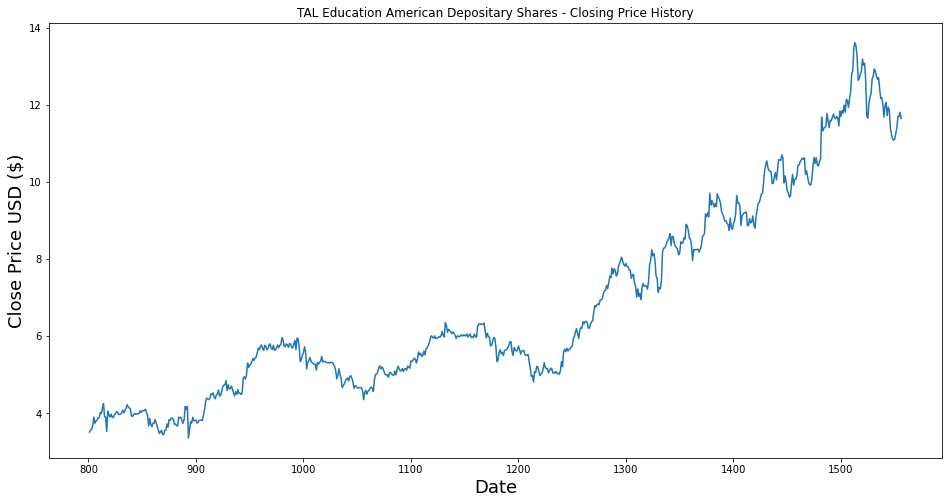

In [103]:
ut.plot_closing_price_history(df_stock_market['Close'], company_name)

### II.2.2. Exponential Moving Average (EMA)

In [104]:
# calculate  EMA for the last 60 days
df_stock_market['EMA_60'] = df_stock_market.iloc[:,3].ewm(span=60,adjust=False).mean()

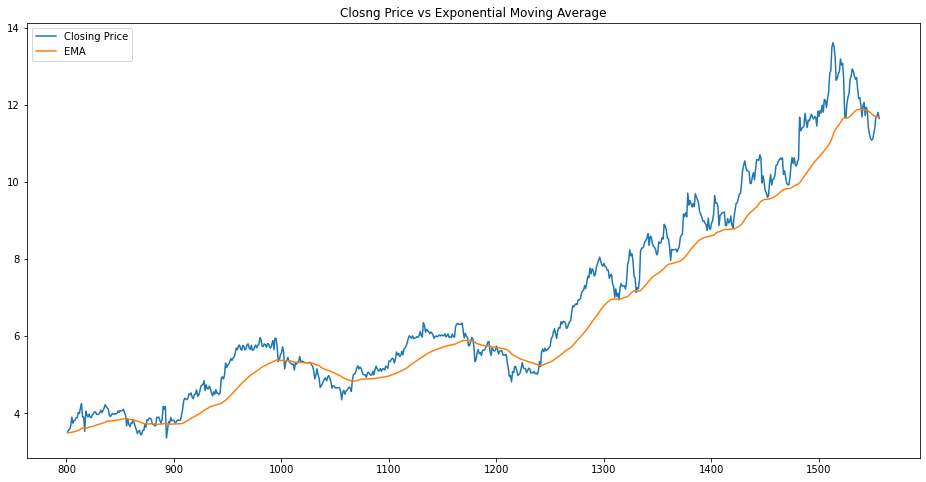

In [105]:
# plot closing price and moving average
ut.plot_closing_price_and_EMA(df_stock_market['Close'], df_stock_market['EMA_60'])

# III. Preparing data for LSTM

**1. Converting the data into array**

In [106]:
# filter only the 'Close' column
dataset = df_stock_market.filter(['Close'])

# and convert it to a numpy array
data = dataset.values

**2. Scaling the data.**

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(data)

**3. creating train & test data**

The train and test sets are going to contain moving values. 

**training set**: the past 60 day closing price values<br>
**test_set**: closing price on the 61st day

In [108]:
# we need to store the training data lenght into a separate variable, as we will need it for plotting the results later
training_data_len, x_train, y_train, x_test, y_test = ut.create_train_test_split(.7, 60, data, scaled_data)

**4. preparing data sets for LSTM**

LSTM is expecting a 3D dataset in the following format: [number of samples, number of time steps, and number of features]


In [109]:
# creating 3D arrays from train and test
x_train, y_train = ut.create_3D_arrays(x_train, y_train)
x_test, y_test = ut.create_3D_arrays(x_test, y_test)

# IV. Modelling
Create the predicitve model using LSTM.

In [110]:
# build the LSTM  model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [111]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [112]:
# train the model
model.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
470/470 [==============================] - 4s 8ms/step - loss: 0.0054 - ETA: 4s - loss: 0.0138

# V. Prediction

In [113]:
# get the model's predicted stock prices
predictions = model.predict(x_test)

# undo the scaling, so we can see the real prices, not the normalized ones
predictions = scaler.inverse_transform(predictions)

In [114]:
# Calculate RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.4572923101575794

D:\Bea\Projects\github\stock_price_prediction\utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Setting the new value


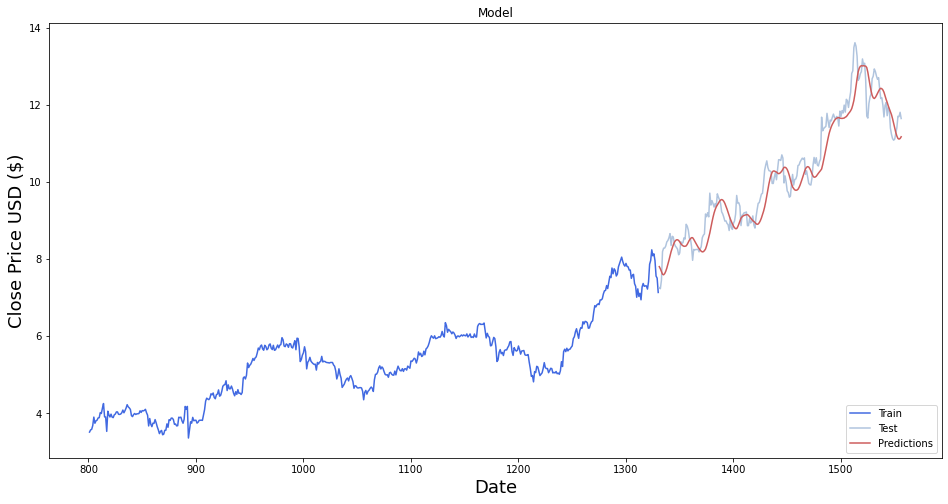

In [129]:
# see real and predicted values
ut.plot_result(dataset, training_data_len, predictions)